# Lab 5- Programming assignment 1 instructions

CS440/640: Lab#5

Lab goal: 
<br>      1) understand the code about 2-layer neural network without any hidden layers                                             <br>      2) learn how to implement a 3-layer neural network with 1 hidden layer               



In [14]:
# Import Python libraries
import numpy as np    # numpy is the fundamental package for scientific computing with Python, such linear algebra, array...
import matplotlib.pyplot as plt # matplotlib is a Python 2D plotting library which produces publication quality figures.
%matplotlib inline

## Logistic Regression Model 


In [15]:
class LogisticRegression:
    """
    This lab implements a Logistic Regression Classifier.
    """
    
    def __init__(self, input_dim, hidden_layer, output_dim):
        """
        Initializes the parameters of the logistic regression classifer to 
        random values.
        
        args:
            input_dim: Number of dimensions of the input data
            output_dim: Number of classes
        """
        
        self.theta = np.random.randn(input_dim,hidden_layer) / np.sqrt(input_dim)
        
        self.theta1 = np.random.randn(hidden_layer,output_dim) / np.sqrt(hidden_layer)
        
        self.bias= np.zeros((1,hidden_layer))
        
        self.bias1 = np.zeros((1, output_dim))
        
        
        
    #--------------------------------------------------------------------------
    
    def compute_cost(self,X, y):
        """
        Computes the total cost on the dataset.
        
        args:
            X: Data array
            y: Labels corresponding to input data
        
        returns:
            cost: average cost per data sample
        """
        num_examples = np.shape(X)[0]
        z = np.dot(X,self.theta) + self.bias
        exp_z = np.exp(z)
        scores = exp_z / (exp_z+1)
        z1=np.dot(scores,self.theta1) + self.bias1
        exp_z1=np.exp(z1)
        scores1=exp_z1 / (exp_z1+1)
        
        one_hot_y = np.zeros((num_examples,np.max(y)+1))
        logloss = np.zeros((num_examples,))        
        for i in range(np.shape(X)[0]):
            one_hot_y[i,y[i]] = 1
            logloss[i] = -np.sum(np.log(scores1[i,:]) * one_hot_y[i,:])
        data_loss = np.sum(logloss)
        return 1./num_examples * data_loss

    
    #--------------------------------------------------------------------------
 
    def predict(self,X):
        """
        Makes a prediction based on current model parameters.
        
        args:
            X: Data array
            
        returns:
            predictions: array of predicted labels
        """
        z = np.dot(X,self.theta)+self.bias
        exp_z = np.exp(z)
        scores = exp_z / (exp_z+1)
        z1=np.dot(scores,self.theta1) + self.bias1
        exp_z1=np.exp(z1)
        scores1=exp_z1 / (exp_z1+1)
        predictions = np.argmax(scores1, axis = 1)
        return predictions
        
    #--------------------------------------------------------------------------
    # TODO: implement logistic regression using gradient descent 
    #--------------------------------------------------------------------------
   
    def fit(self,X,y,num_epochs,lr=0.01,lambda1=0.03):
        for epoch in range(0, num_epochs):

            # Forward propagation
            z = np.dot(X,self.theta)+self.bias
            exp_z = np.exp(z)
            scores = exp_z / (exp_z+1)
            z1=np.dot(scores,self.theta1) + self.bias1
            exp_z1=np.exp(z1)
            scores1=exp_z1 / (exp_z1+1)
            # Backpropagation
            beta = np.zeros_like(scores1)
            one_hot_y = np.zeros_like(scores1)
            for i in range(X.shape[0]):
                one_hot_y[i,y[i]] = 1
            beta = scores1 - one_hot_y 
            k=np.dot(beta,self.theta1.T)
            beta1=scores*(1-scores)*k 
            
    
            # Compute gradients of model parameters
            dtheta1 = np.dot(scores.T,beta) + lambda1*self.theta1             
            dbias1 = np.sum(beta, axis=0)
            self.theta1 -= lr*dtheta1
            self.bias1 -= lr*dbias1
            
            dtheta=np.dot(X.T,beta1) + lambda1*self.theta
            dbias=np.sum(beta1, axis=0)
            self.theta -= lr*dtheta
            self.bias -= lr*dbias
            
    
            
            
        return 0


In [16]:
def plot_decision_boundary(model, X, y):
    """
    Function to print the decision boundary given by model.
    
    args:
        model: model, whose parameters are used to plot the decision boundary.
        X: input data
        y: input labels
    """
    
    x1_array, x2_array = np.meshgrid(np.arange(-4, 4, 0.01), np.arange(-4, 4, 0.001))
    grid_coordinates = np.c_[x1_array.ravel(), x2_array.ravel()]
    Z = model.predict(grid_coordinates)
    Z = Z.reshape(x1_array.shape)
    plt.contourf(x1_array, x2_array, Z, cmap=plt.cm.bwr)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)
    plt.show()

## Initialization

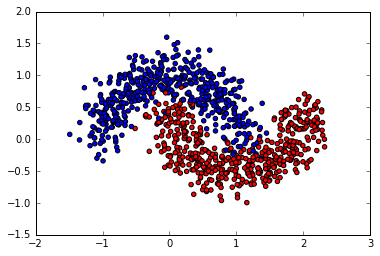

In [17]:
#1. Load and plot data
X = np.genfromtxt('DATA/NonlinearX.csv', delimiter=',') 
y = np.genfromtxt('DATA/NonlinearY.csv', delimiter=',').astype(np.int64)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr)
plt.show()


In [18]:
#2. Initialize model
input_dim = np.shape(X)[1]
hidden_layer = 20
output_dim = np.max(y) + 1
logreg = LogisticRegression(input_dim,hidden_layer, output_dim)

## Train Classification Model

In [19]:
#3. Train the model, plot decision boundary after trainning
logreg.fit(X,y,1000,lr=0.001,lambda1=0.5)
plot_decision_boundary(logreg, X, y)

KeyboardInterrupt: 

## Model Evaluation

In [12]:
#4. compute accuracy and confusion matrix
acc = 0
y_pred = logreg.predict(X)
con_mat = np.zeros((output_dim, output_dim))
for i in range(len(y_pred)):
    con_mat[y_pred[i], y[i]] += 1
    if y[i] == y_pred[i]:
        acc += 1
acc = acc/len(y_pred)
print ('ACCURACY: ', acc)
print ('CONFUSION MATRIX: \n', con_mat)

ACCURACY:  0.942
CONFUSION MATRIX: 
 [[470.  28.]
 [ 30. 472.]]


In [13]:
#5. compute cost
cost = logreg.compute_cost(X,y)
print (cost)

0.16661900186664355
